In [54]:
n=4
k=2
q=41 #Lithium AAA?  #same as Alkaline D
#q should be divisible by 8 for NTT
η=1 #secret key range, prefered 2 in Alkaline
γ=2^4 #y coeff range, power of 2, exponent about 2/3 of q?  Earlier version was *not* power of 2
R.<x> = ZZ[]

In [55]:
qlen = ceil(log(q,2))
qlen

6

In [56]:
dboxlen = qlen

$(M \bullet w) \bmod 64$

In [57]:
def Dbox(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % (2**itemlen) # make sure all bits of input are used
    out = format(newitem, f'0{itemlen}b')
    return out

In [58]:
def Dboxraw(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % (2**itemlen) # make sure all bits of input are used
    out = newitem
    return out

In [59]:
[randrange(1,27) for x in range(n)] # generate random message

[8, 9, 12, 12]

In [60]:
[randrange(0, q) for x in range(n)] # generate random commit

[32, 13, 37, 19]

In [61]:
Dbox([randrange(1,27) for x in range(n)], [randrange(0, q) for x in range(4)], dboxlen)

'101001'

In [62]:
for i in range(1,10):
    print(Dboxraw([randrange(1,27) for x in range(n)], [randrange(0, q) for x in range(4)], dboxlen))

11
30
2
4
54
42
17
51
4


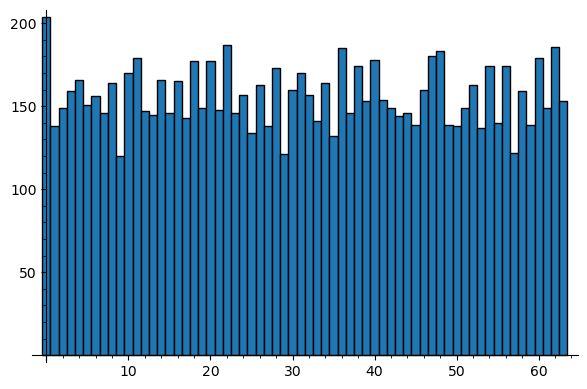

In [63]:
datalist = []
for i in range(10000):
    datalist = datalist + [Dboxraw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

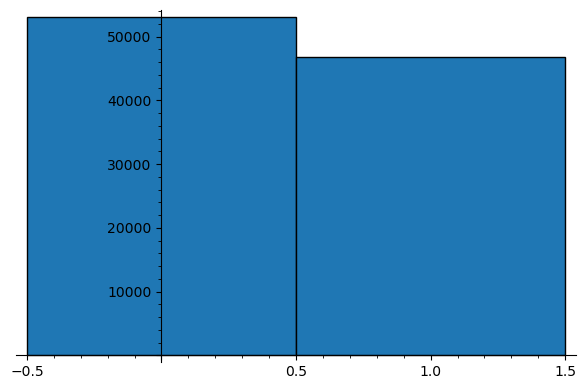

In [64]:
datalist = []
for i in range(100000):
    datalist = datalist + [Dboxraw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen) % 2]
sage.plot.histogram.histogram(datalist, bins=2, range=[-0.5, 1.5])

In [65]:
mean(datalist).n()

/tmp/ipykernel_83746/2718649496.py:1: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://trac.sagemath.org/29662 for details.
  mean(datalist).n()


0.468580000000000

$f(M \bullet w \bmod 41) \bmod 64$

In [2]:
def f(x):  #permutation polynomial mod 2^n
    return 2*x^2 + x

In [11]:
def Dbox41raw(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % q # make sure all bits of input are used
    out = f(newitem) % (2**itemlen)
    return out

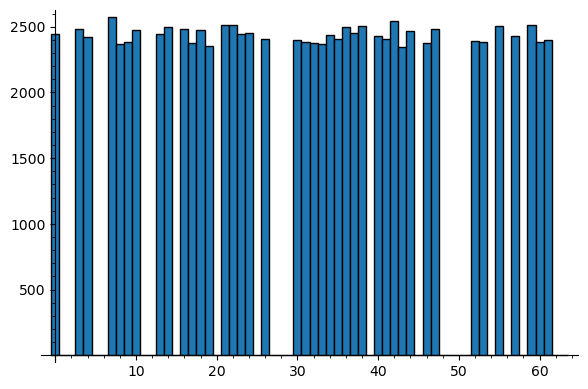

In [14]:
datalist = []
for i in range(100000):
    datalist = datalist + [Dbox41raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

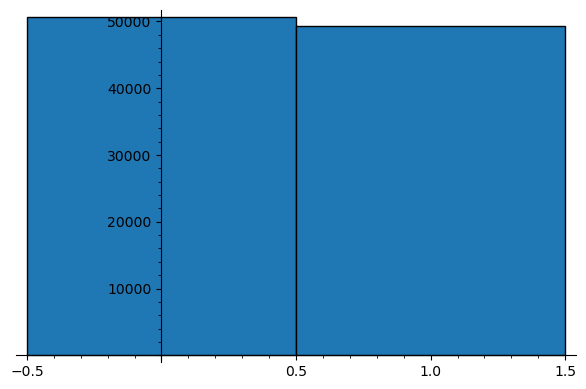

In [66]:
datalist = []
for i in range(100000):
    datalist = datalist + [Dbox41raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen) % 2]
sage.plot.histogram.histogram(datalist, bins=2, range=[-0.5, 1.5])

In [67]:
mean(datalist).n()

/tmp/ipykernel_83746/2718649496.py:1: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://trac.sagemath.org/29662 for details.
  mean(datalist).n()


0.492780000000000

$(M \bullet w \bmod 65) \bmod 64$

In [15]:
def f(x):  #permutation polynomial mod 2^n
    return 2*x^2 + x

In [22]:
def Dbox65raw(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % (2**itemlen+1) # make sure all bits of input are used
    out = (newitem) % (2**itemlen)
    return out

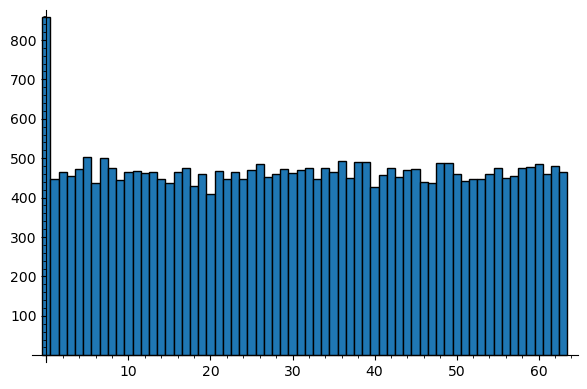

In [23]:
datalist = []
for i in range(30000):
    datalist = datalist + [Dbox65raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

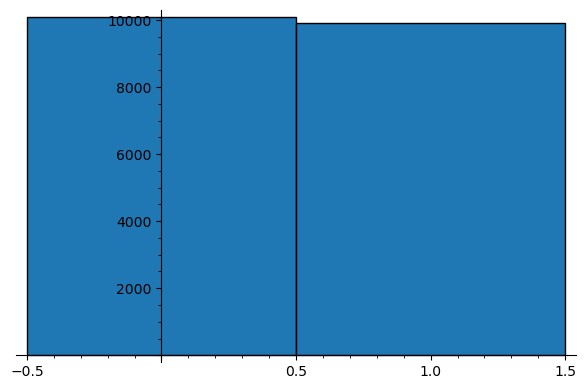

In [71]:
datalist = []
for i in range(20000):
    datalist = datalist + [Dbox65raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen) % 2]
sage.plot.histogram.histogram(datalist, bins=2, range=[-0.5, 1.5])

In [72]:
mean(datalist).n()

/tmp/ipykernel_83746/2718649496.py:1: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://trac.sagemath.org/29662 for details.
  mean(datalist).n()


0.494900000000000

$(M \bullet w \bmod 67) \bmod 64$

In [2]:
def f(x):  #permutation polynomial mod 2^n
    return 2*x^2 + x

In [30]:
def Dbox67raw(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % (2**itemlen+3) # make sure all bits of input are used
    out = (newitem) % (2**itemlen)
    return out

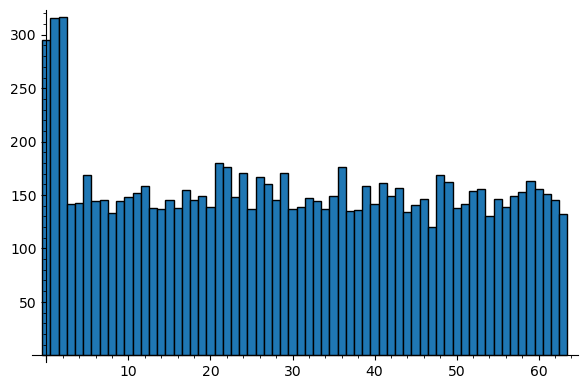

In [31]:
datalist = []
for i in range(10000):
    datalist = datalist + [Dbox67raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

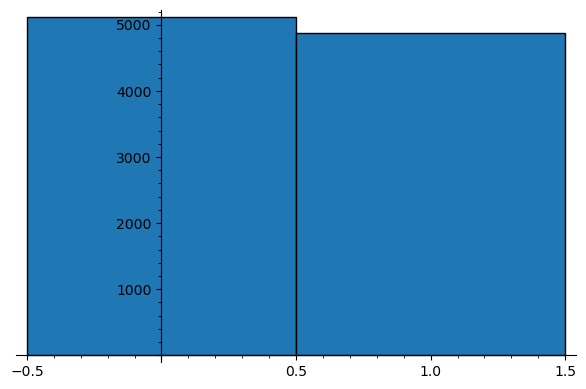

In [50]:
datalist = []
for i in range(10000):
    datalist = datalist + [Dbox67raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen) % 2]
sage.plot.histogram.histogram(datalist, bins=2, range=[-0.5, 1.5])

In [51]:
mean(datalist).n()

/tmp/ipykernel_83746/2718649496.py:1: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://trac.sagemath.org/29662 for details.
  mean(datalist).n()


0.487600000000000

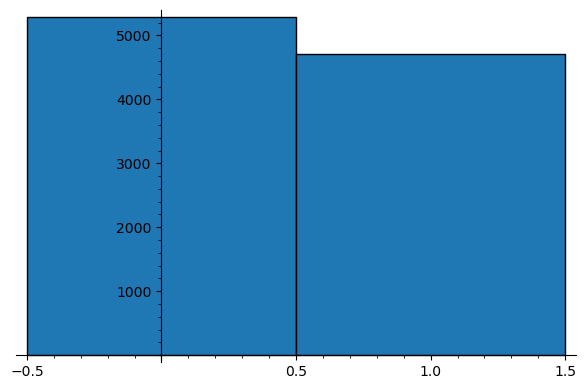

In [52]:
datalist = []
for i in range(10000):
    datalist = datalist + [Dbox67raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen) // (2**(dboxlen-1))]
sage.plot.histogram.histogram(datalist, bins=2, range=[-0.5, 1.5])

In [53]:
mean(datalist).n()

/tmp/ipykernel_83746/2718649496.py:1: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://trac.sagemath.org/29662 for details.
  mean(datalist).n()


0.470800000000000